In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [15]:
readingsImp=reading.select_dtypes(exclude=['object'])

In [16]:
from fancyimpute import MICE as mice
readingsImp=pd.DataFrame(data=mice().complete(readingsImp), columns=readingsImp.columns, index=readingsImp.index)

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[MICE] Completing matrix with shape (214985, 36)
[MICE] Starting imputation round 1/110, elapsed time 0.077
[MICE] Starting imputation round 2/110, elapsed time 0.388
[MICE] Starting imputation round 3/110, elapsed time 0.703
[MICE] Starting imputation round 4/110, elapsed time 1.006
[MICE] Starting imputation round 5/110, elapsed time 1.314
[MICE] Starting imputation round 6/110, elapsed time 1.635
[MICE] Starting imputation round 7/110, elapsed time 1.950
[MICE] Starting imputation round 8/110, elapsed time 2.256
[MICE] Starting imputation round 9/110, elapsed time 2.569
[MICE] Starting imputation round 10/110, elapsed time 2.870
[MICE] Starting imputation round 11/110, elapsed time 3.170
[MICE] Starting imputation round 12/110, elapsed time 3.482
[MICE] Starting imputation round 13/110, elapsed time 3.808
[MICE] Starting imputation round 14/110, elapsed time 4.177
[MICE] Starting imputation round 15/110, elapsed time 4.487
[MICE] Starting imputation round 16/110, elapsed time 4.797


In [17]:
readings=pd.merge(readingsImp, reading.select_dtypes(exclude=['float64', 'int64']), right_index=True, left_index=True, how = 'outer')

In [29]:
alarm58=alarm[alarm[''].isin([22858])]
alarm58['delta'] = (alarm58['SetDate']-alarm58[''].shift()).fillna(0)
alarm58['hours']=(alarm58.delta / np.timedelta64(1, 'h'))

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
readings58=readings[readings[''].isin([22858])]
readings58['delta'] = (readings58['']-readings58[''].shift()).fillna(0)
readings58['hours']=(readings58.delta / np.timedelta64(1, 'h'))

C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\PAUL-PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


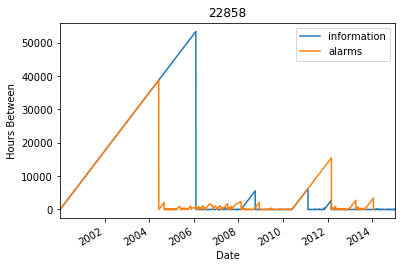

In [42]:
ax = readings58.plot(x='', y='hours', label='information')
alarm58.plot(ax=ax, x='', y='hours', label='alarms')
plt.title('22858')
plt.xlabel('Date')
plt.ylabel('Hours Between')
#plt.show()
plt.savefig("22858t__%d.png"%i, dpi=300)